In [21]:
import numpy as np
import lightgbm as lgb
import pandas as pd
import sklearn

In [22]:
# create random dataset
f_matrix = pd.read_parquet("../data/f_matrix.parquet")  # [50030 rows x 8 columns]
b_matrix = pd.read_parquet("../data/b_matrix.parquet")  # [50030 rows x 85 columns]
targets = pd.read_parquet("../data/target.parquet")  # [50030 rows x 5 columns]

In [23]:
moons = f_matrix.date.unique()

In [24]:
# set hyperparameters for lightGBM
params = {
    "objective": "regression",
    "max_depth": 16,
    # 'learning_rate': 0.1,
    # "num_leaves": 131072,
    # 'n_estimators': 2000,
}

In [ ]:
error = []
# define custom loss function
def custom_loss(y_true, data):
    print(" handling moon", moon)
    y_hat = data.get_label()
    Omega = np.identity(len(y_hat)) - np.dot(b_moon, np.linalg.pinv(b_moon))
    z_hat = np.dot(Omega, y_hat)

    error.append(np.dot(z_hat - y_true, z_hat - y_true) / len(y_hat))
    print(error[-1])

    grad = 2 * np.dot(Omega, np.dot(Omega, y_hat) - y_true) / len(y_hat)
    hess = np.ones_like(grad)  # 2*np.dot(Omega, Omega)
    return (grad, hess)

In [ ]:
# train model for 5 epochs using custom loss function
for i in range(2):
    print(f"Epoch {i+1}")
    # create minibatch of data
    # batch_size = 100
    for moon in moons:
        X_moon = f_matrix[f_matrix.date == moon].drop(columns=["date"]).values
        y_moon = (
            targets[targets.date == moon].drop(columns=["date"]).values[:, -1].ravel()
        )

        b_moon = b_matrix[b_matrix.date == moon].drop(columns=["date"]).values
        # train model on minibatch using custom loss function
        # import pdb; pdb.set_trace()
        train_data_batch = lgb.Dataset(X_moon, label=y_moon)
        lgb.train(params, train_data_batch, num_boost_round=1, fobj=custom_loss)

In [ ]:
import matplotlib.pyplot as plt

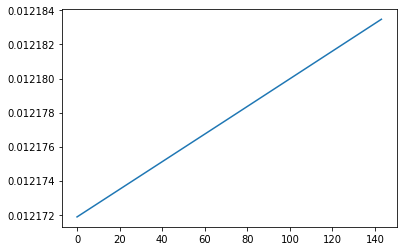

In [17]:
plt.plot(error)